In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns


In [81]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [82]:
# normalize age between 0 and 1

variable = ["Age"]

# create a new column callled "Age_norm", copy "Age" for now
data["Age_norm"] = data["Age"] 


scaler = MinMaxScaler()

for i in range(0, len(variable)):
    # taking out values of "Age" and make a new array
    temp = data[variable[i]]
    temp1 = temp.values.reshape(-1,1)

    # fit the scalar to the values
    scaler.fit(temp1)
    
    # transform the values
    norm = scaler.transform(temp1)

    # change "Age_norm" values to normalised values 
    data["Age_norm"] = norm
    
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_norm
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.324324
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.310811
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.324324
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.283784
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.337838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.283784
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.229730
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.243243
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.324324


,RowNumber,EstimatedSalary
0,1,101348.88
1,2,112542.58
2,3,113931.57
3,4,93826.63
4,5,79084.10
...,...,...
9995,9996,96270.64
9996,9997,101699.77
9997,9998,42085.58
9998,9999,92888.52


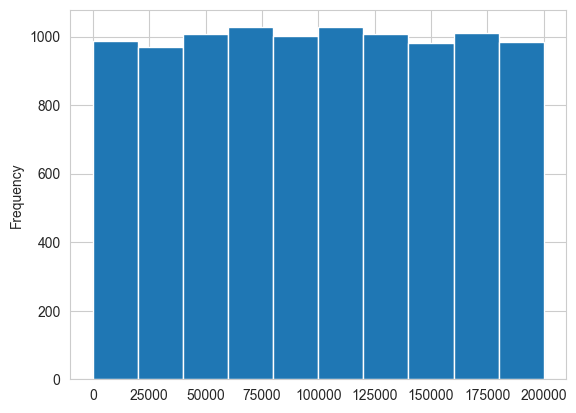

In [96]:
# Bucket "EstimatedSalary" using buckets with quantile boundaries

# making histogram
sns.set_style("whitegrid")

estimated_df = data.groupby(["RowNumber"])["EstimatedSalary"].sum().reset_index()

estimated_df["EstimatedSalary"].plot(kind = "hist")
estimated_df

In [102]:
#qcut

data["Q_EstimatedSalary"] = pd.qcut(estimated_df["EstimatedSalary"], q = 5)

# check if it's qcut properly
data["Q_EstimatedSalary"].value_counts()

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_norm,quantile,Q_EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.324324,"(80238.34, 119710.038]","(80238.34, 119710.038]"
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.310811,"(80238.34, 119710.038]","(80238.34, 119710.038]"
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.324324,"(80238.34, 119710.038]","(80238.34, 119710.038]"
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.283784,"(80238.34, 119710.038]","(80238.34, 119710.038]"
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.337838,"(41050.736, 80238.34]","(41050.736, 80238.34]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.283784,"(80238.34, 119710.038]","(80238.34, 119710.038]"
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.229730,"(80238.34, 119710.038]","(80238.34, 119710.038]"
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.243243,"(41050.736, 80238.34]","(41050.736, 80238.34]"
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.324324,"(80238.34, 119710.038]","(80238.34, 119710.038]"
